In [20]:
import sqlalchemy
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine, Column, Integer, String
Base = declarative_base()

In [2]:
engine = create_engine("sqlite:///emoji.sqlite")

In [3]:
inspector = inspect(engine)

In [4]:
inspector.get_table_names()

['emoji']

In [5]:
columns = inspector.get_columns('emoji')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
emoji_char TEXT
emoji_id TEXT
name TEXT
score INTEGER


In [6]:
class Emoji(Base):
    __tablename__ = 'emoji'
    id = Column(Integer,primary_key=True)
    emoji_char = Column(String)
    emoji_id = Column(String)
    name = Column(String)
    score = Column(Integer)

In [7]:
session = Session(engine)

In [10]:
database = session.query(Emoji.id, Emoji.emoji_char,Emoji.emoji_id,Emoji.name,Emoji.score).all()

In [12]:
emoji_df = pd.DataFrame(database)

In [13]:
emoji_df.head(5)

,id,emoji_char,emoji_id,name,score
0,1,😂,1F602,FACE WITH TEARS OF JOY,1814832150
1,2,❤️,2764,HEAVY BLACK HEART,840619939
2,3,😍,1F60D,SMILING FACE WITH HEART-SHAPED EYES,680382416
3,4,♥️,2665,BLACK HEART SUIT,652715459
4,5,😭,1F62D,LOUDLY CRYING FACE,515991922


In [51]:
ranked = emoji_df.set_index('emoji_id')
ranked = ranked.sort_values('score', ascending=False)
ranked.head(5)

,id,emoji_char,name,score
emoji_id,,,,
1F602,1,😂,FACE WITH TEARS OF JOY,1814832150
2764,2,❤️,HEAVY BLACK HEART,840619939
1F60D,3,😍,SMILING FACE WITH HEART-SHAPED EYES,680382416
2665,4,♥️,BLACK HEART SUIT,652715459
1F62D,5,😭,LOUDLY CRYING FACE,515991922


<BarContainer object of 10 artists>

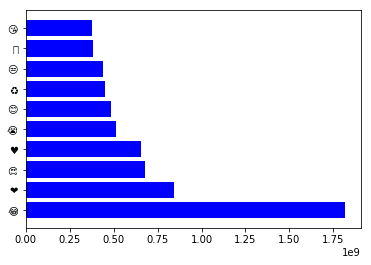

In [53]:
top_10 = ranked.head(10)
y = top_10['emoji_char']
x = top_10['score']

plt.barh(y,x, color='blue', align='center')

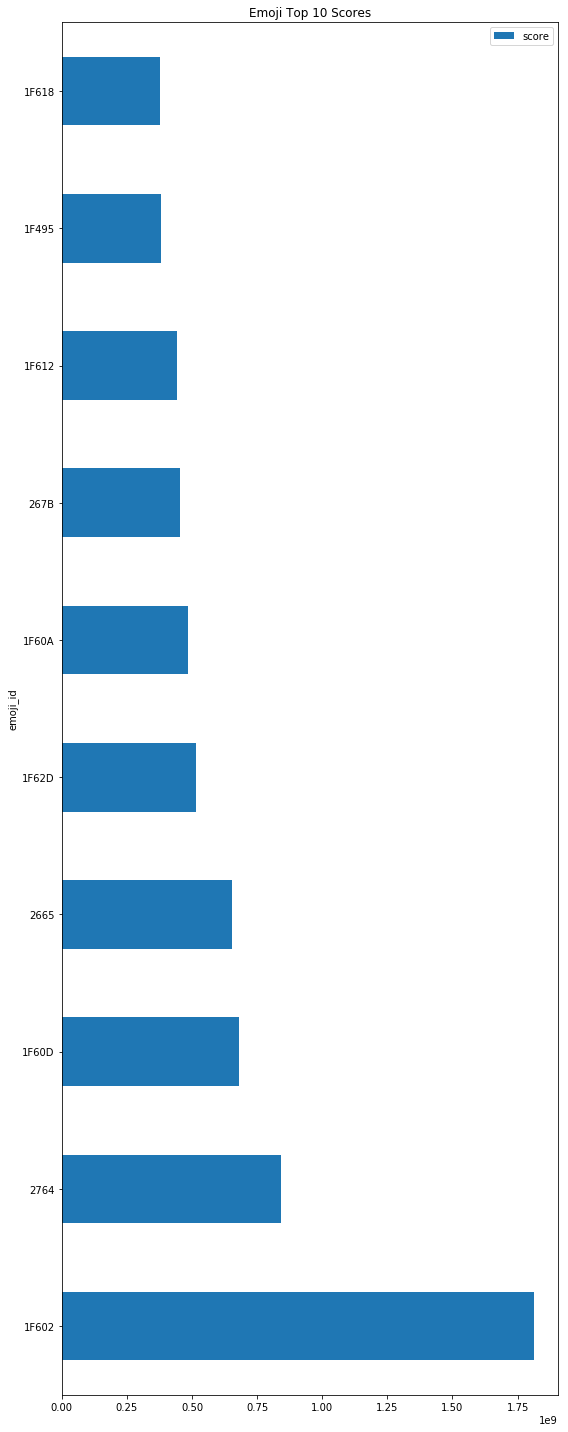

In [57]:
normal = top_10[["emoji_char", "score"]]
normal.plot(kind='barh', figsize=(8,20))
plt.title('Emoji Top 10 Scores')
plt.tight_layout()
plt.show()